In [1]:
import os
import time 
import numpy as np 
import torch
import random
import matplotlib.pyplot as plt
from torch.utils import data
from loader.QSM_data_loader2 import QSM_data_loader2
from utils.data import *
from utils.files import *
from models.unet import Unet

In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0' 
dataLoader = QSM_data_loader2()
trainLoader = data.DataLoader(dataLoader, batch_size=1, shuffle=False)

Loading COSMOS data 0


OSError: Unable to open file (unable to open file: name = '/home/sdc/Jinwei/QSM/1*1*3recon/2/RDF_smv_3mm.mat', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
for idx, (input_RDFs, in_loss_RDFs, QSMs, Masks, \
    fidelity_Ws, gradient_Ws, flag_COSMOS) in enumerate(trainLoader):

    input_RDFs = input_RDFs[0, ...]
    in_loss_RDFs = in_loss_RDFs[0, ...]
    QSMs = QSMs[0, ...]
    Masks = Masks[0, ...]
    fidelity_Ws = fidelity_Ws[0, ...]
    gradient_Ws = gradient_Ws[0, ...]
    
    # asarray
    input_RDFs = np.asarray(input_RDFs)
    in_loss_RDFs = np.asarray(in_loss_RDFs)
    QSMs = np.asarray(QSMs)
    Masks = np.asarray(Masks)
    fidelity_Ws = np.asarray(fidelity_Ws)
    gradient_Ws = np.asarray(gradient_Ws)

    print(flag_COSMOS)
    print(input_RDFs.shape)

In [ ]:
# plot
slice_idx = 16
idx_plot = np.random.choice(input_RDFs.shape[0], size=(4, ), replace=False)
plots(input_RDFs[:, 0, ..., slice_idx][idx_plot, ...], rows=1, scale=(-0.1, 0.1))
plots(in_loss_RDFs[:, 0, ..., slice_idx][idx_plot, ...], rows=1, scale=(-0.05, 0.05))
plots(Masks[:, 0, ..., slice_idx][idx_plot, ...], rows=1, scale=(0, 1))
plots(fidelity_Ws[:, 0, ..., slice_idx][idx_plot, ...], rows=1, scale=(0, 1))
plots(QSMs[:, 0, ..., slice_idx][idx_plot, ...], rows=1, scale=(-0.15, 0.15))

In [ ]:
plots(gradient_Ws[:, 0, ..., slice_idx, 0][idx_plot, ...], rows=1, scale=(0, 1))
plots(gradient_Ws[:, 0, ..., slice_idx, 1][idx_plot, ...], rows=1, scale=(0, 1))
plots(gradient_Ws[:, 0, ..., slice_idx, 2][idx_plot, ...], rows=1, scale=(0, 1))

## Plot for amortized vs subject-specific 

In [65]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [66]:
loss = np.load('/data/Jinwei/Bayesian_QSM/loss_ICH_8.npy')
# loss_amort = np.ones(loss.shape) * 15345431.312500  # ICH16
loss_amort = np.ones(loss.shape) * 15388324.500000  # ICH8

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


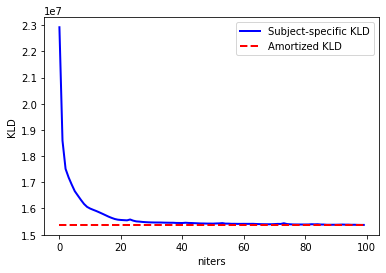

In [67]:
plt.plot(np.arange(100), loss, color='blue', linewidth=2, label='Subject-specific KLD')
plt.plot(np.arange(100), loss_amort, color='red', linewidth=2, linestyle='dashed', label="Amortized KLD")
plt.legend()
plt.ylabel('KLD')
plt.xlabel('niters')
plt.savefig("ich8.eps", format='eps')

## TV loss

In [78]:
patientID = 1  ## o for ICH8, 1 for ICH16
if patientID == 0:
    patientID = 8
    f_loss = open('/data/Jinwei/Bayesian_QSM/loss_ICH_8_full.txt', 'r') 
    losses_amort = [3369584.5, 11483445.0, 535867.9]
else:
    patientID = 16
    f_loss = open('/data/Jinwei/Bayesian_QSM/loss_ICH_16_full.txt', 'r') 
    losses_amort = [3418204.8, 11455530.0, 470632.09]
loss_all = f_loss.read()

In [79]:
TV_loss_idx = [m.start() for m in re.finditer('TV_loss', loss_all)]
TV_loss = np.zeros(100)
for i, loss_idx in enumerate(TV_loss_idx):
    TV_loss[i] = loss_all[loss_idx+9:loss_idx+20]

In [80]:
TV_loss_amort = np.ones(TV_loss.shape) * losses_amort[0]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


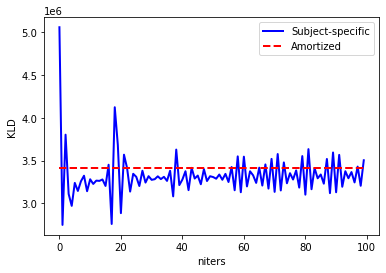

In [81]:
plt.plot(np.arange(100), TV_loss, color='blue', linewidth=2, label='Subject-specific')
plt.plot(np.arange(100), TV_loss_amort, color='red', linewidth=2, linestyle='dashed', label="Amortized")
plt.legend()
plt.ylabel('KLD')
plt.xlabel('niters')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0.15e7, 0.4e7))
plt.savefig("ich{}_tv.eps".format(patientID), format='eps')

## Entropy loss

In [82]:
Entropy_loss_idx = [m.start() for m in re.finditer('Entropy loss', loss_all)]
Entropy_loss = np.zeros(100)
for i, loss_idx in enumerate(Entropy_loss_idx):
    Entropy_loss[i] = loss_all[loss_idx+14:loss_idx+26]

In [83]:
Entropy_loss_amort = np.ones(Entropy_loss.shape) * losses_amort[1]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


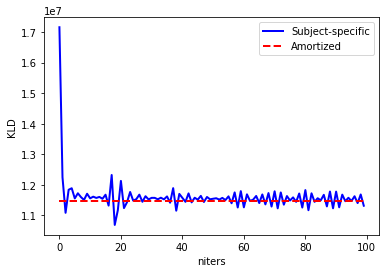

In [84]:
plt.plot(np.arange(100), Entropy_loss, color='blue', linewidth=2, label='Subject-specific')
plt.plot(np.arange(100), Entropy_loss_amort, color='red', linewidth=2, linestyle='dashed', label="Amortized")
plt.legend()
plt.ylabel('KLD')
plt.xlabel('niters')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0.15e7, 0.4e7))
plt.savefig("ich{}_entropy.eps".format(patientID), format='eps')

## Expectation loss

In [85]:
Expectation_loss_idx = [m.start() for m in re.finditer('Expectation_loss', loss_all)]
Expectation_loss = np.zeros(100)
for i, loss_idx in enumerate(Expectation_loss_idx):
    Expectation_loss[i] = loss_all[loss_idx+17:loss_idx+27]

In [86]:
Expectation_loss_amort = np.ones(Expectation_loss.shape) * losses_amort[2]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


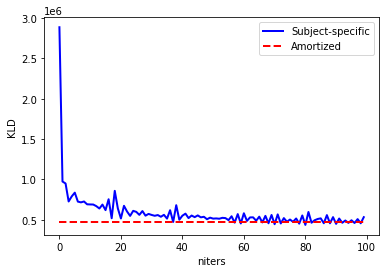

In [87]:
plt.plot(np.arange(100), Expectation_loss, color='blue', linewidth=2, label='Subject-specific')
plt.plot(np.arange(100), Expectation_loss_amort, color='red', linewidth=2, linestyle='dashed', label="Amortized")
plt.legend()
plt.ylabel('KLD')
plt.xlabel('niters')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0.15e7, 0.4e7))
plt.savefig("ich{}_expectation.eps".format(patientID), format='eps')

## Plot for PDI-VI and PDI-VI0 validation KL divergence  

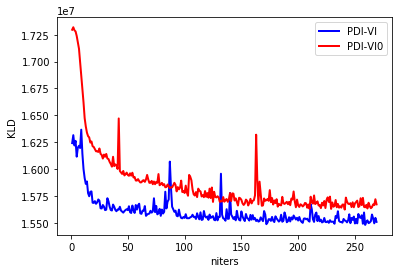

In [57]:
idx_end = 270

loss = np.load('/data/Jinwei/Bayesian_QSM/loss_validation_ICH_VI.npy')
loss0 = np.load('/data/Jinwei/Bayesian_QSM/loss_validation_ICH_VI0.npy')

loss = loss[loss <1.8e7]

plt.plot(np.arange(1, idx_end), loss[1:idx_end], color='blue', linewidth=2, label='PDI-VI')
plt.plot(np.arange(1, idx_end), loss0[1:idx_end], color='red', linewidth=2, label="PDI-VI0")
plt.legend()
plt.ylabel('KLD')
plt.xlabel('niters')
plt.savefig("PDI-VI vs PDI-VI0.jpg".format(patientID), dpi=150)

In [ ]:
ICH8: 15399900.062500, 15501097.625000
ICH16: 15333227.656250, 15430363.562500